# Trabajo Final Infoviz

#### Grupo N° 7

Integrandes:

* Arrue, Marcos
* De Simone, Guillermo
* Lopez Figueredo, Federico

In [1]:
# Importacion de librerias
import pandas as pd
import altair as alt
import duckdb
import geopandas as gpd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 25)


## Analisis Exploratorio

In [2]:
## Estructura de resulatdos electorales paso

paso=duckdb.sql("""SELECT *
FROM re_paso.parquet
LIMIT 5""").df()

paso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   año                       5 non-null      int64 
 1   eleccion_tipo             5 non-null      object
 2   recuento_tipo             5 non-null      object
 3   padron_tipo               5 non-null      object
 4   distrito_id               5 non-null      int64 
 5   distrito_nombre           5 non-null      object
 6   seccionprovincial_id      5 non-null      int64 
 7   seccionprovincial_nombre  5 non-null      object
 8   seccion_id                5 non-null      int64 
 9   seccion_nombre            5 non-null      object
 10  circuito_id               5 non-null      object
 11  circuito_nombre           5 non-null      object
 12  mesa_id                   5 non-null      int64 
 13  mesa_tipo                 5 non-null      object
 14  mesa_electores            5 no

In [3]:
## Visualizamos registros de las paso
paso.head(5)

,año,eleccion_tipo,recuento_tipo,padron_tipo,distrito_id,distrito_nombre,seccionprovincial_id,seccionprovincial_nombre,seccion_id,seccion_nombre,circuito_id,circuito_nombre,mesa_id,mesa_tipo,mesa_electores,cargo_id,cargo_nombre,agrupacion_id,agrupacion_nombre,lista_numero,lista_nombre,votos_tipo,votos_cantidad
0,2023,PASO,PROVISORIO,NORMAL,2,Buenos Aires,3,Sección Tercera,62,Lanús,00265,00265,513,NATIVOS,351,1,PRESIDENTE/A,20,UNION DEL CENTRO DEMOCRATICO,3018,A- APERTURA LIBERAL ARGENTINA,POSITIVO,0
1,2023,PASO,PROVISORIO,NORMAL,2,Buenos Aires,3,Sección Tercera,62,Lanús,00265,00265,513,NATIVOS,351,1,PRESIDENTE/A,0,None,0,None,EN BLANCO,13
2,2023,PASO,PROVISORIO,NORMAL,2,Buenos Aires,3,Sección Tercera,62,Lanús,00265,00265,513,NATIVOS,351,1,PRESIDENTE/A,0,None,0,None,NULO,2
3,2023,PASO,PROVISORIO,NORMAL,2,Buenos Aires,3,Sección Tercera,62,Lanús,00265,00265,513,NATIVOS,351,1,PRESIDENTE/A,0,None,0,None,IMPUGNADO,0
4,2023,PASO,PROVISORIO,NORMAL,2,Buenos Aires,3,Sección Tercera,62,Lanús,00265,00265,513,NATIVOS,351,1,PRESIDENTE/A,0,None,0,None,RECURRIDO,0


In [4]:
## Cantidad de registros paso
duckdb.sql("select count(*) as cant from re_paso.parquet").df()

,cant
0,16600877


In [5]:
## Estructura de resulatdos electorales generales o primera vuelta

grales=duckdb.sql("""SELECT *
FROM re_grales.parquet
LIMIT 5""").df()

grales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   año                       5 non-null      int64  
 1   eleccion_tipo             5 non-null      object 
 2   recuento_tipo             5 non-null      object 
 3   padron_tipo               5 non-null      object 
 4   distrito_id               5 non-null      int64  
 5   distrito_nombre           5 non-null      object 
 6   seccionprovincial_id      5 non-null      int64  
 7   seccionprovincial_nombre  0 non-null      object 
 8   seccion_id                5 non-null      int64  
 9   seccion_nombre            5 non-null      object 
 10  circuito_id               5 non-null      object 
 11  circuito_nombre           5 non-null      object 
 12  mesa_id                   5 non-null      int64  
 13  mesa_tipo                 5 non-null      object 
 14  mesa_electores

In [6]:
## Cantidad de registros Generales/Primera vuelta

duckdb.sql("select count(*) as cant from re_grales.parquet").df()

,cant
0,5868102


In [7]:
## Visualizamos registros de las grales
grales.head(5)

,año,eleccion_tipo,recuento_tipo,padron_tipo,distrito_id,distrito_nombre,seccionprovincial_id,seccionprovincial_nombre,seccion_id,seccion_nombre,circuito_id,circuito_nombre,mesa_id,mesa_tipo,mesa_electores,cargo_id,cargo_nombre,agrupacion_id,agrupacion_nombre,lista_numero,lista_nombre,votos_tipo,votos_cantidad
0,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,None,1,Comuna 01,00018,00018,474,NATIVOS,343,1,PRESIDENTE Y VICE,0,None,0.0,None,NULO,0
1,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,None,1,Comuna 01,00018,00018,474,NATIVOS,343,1,PRESIDENTE Y VICE,0,None,0.0,None,IMPUGNADO,0
2,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,None,1,Comuna 01,00018,00018,474,NATIVOS,343,1,PRESIDENTE Y VICE,0,None,0.0,None,RECURRIDO,0
3,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,None,1,Comuna 01,00018,00018,474,NATIVOS,343,1,PRESIDENTE Y VICE,0,None,0.0,None,COMANDO,0
4,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,None,1,Comuna 01,00018,00018,475,NATIVOS,349,1,PRESIDENTE Y VICE,134,UNION POR LA PATRIA,NaN,None,POSITIVO,95


In [8]:
grales_full=duckdb.sql("""SELECT *
FROM re_grales.parquet
""").df()
grales_full.votos_cantidad.describe()

count    5.868102e+06
mean     2.715537e+01
std      3.873856e+01
min      0.000000e+00
25%      0.000000e+00
50%      6.000000e+00
75%      4.800000e+01
max      3.000000e+02
Name: votos_cantidad, dtype: float64

In [12]:
## Utilizamos el archivos de Colores que viene en el paquete de las Generales

source_colores = duckdb.sql("""
select * 
from Colores_grales.parquet;""").df()

source_colores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   año                528 non-null    int64 
 1   distrito_id        528 non-null    int64 
 2   agrupacion_nombre  528 non-null    object
 3   agrupacion_id      528 non-null    int64 
 4   agrupacion_color   528 non-null    object
dtypes: int64(3), object(2)
memory usage: 20.8+ KB


In [13]:
## Visualizamos registros de colores de las grales

source_colores.head()

,año,distrito_id,agrupacion_nombre,agrupacion_id,agrupacion_color
0,2023,1,Ciudad Autónoma de Buenos Aires,13,#E7635F
1,2023,2,Buenos Aires,13,#E7635F
2,2023,3,Catamarca,13,#E7635F
3,2023,4,Córdoba,13,#E7635F
4,2023,5,Corrientes,13,#E7635F


In [14]:
## Obtenemos los colores para cada agrupación

source_colores_agrup = duckdb.sql("""
select b.agrupacion_id,b.agrupacion_nombre,a.agrupacion_color
from Colores_grales.parquet a
join re_grales.parquet b on b.agrupacion_id = a.agrupacion_id
group by b.agrupacion_id,b.agrupacion_nombre,a.agrupacion_color;""").df()

source_colores_agrup.head()

,agrupacion_id,agrupacion_nombre,agrupacion_color
0,134,UNION POR LA PATRIA,#009CDE
1,133,HACEMOS POR NUESTRO PAIS,#43488f
2,132,JUNTOS POR EL CAMBIO,#FEDD00
3,135,LA LIBERTAD AVANZA,#753BBD
4,136,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,#F95461


### Analisis Resultados Electorales Paso

#### Votos a Presidente por Distrito y Agrupación

In [54]:
source_paso = duckdb.sql("""
select 
distrito_nombre as Provincia, 
COALESCE(agrupacion_nombre,'NULA') as Partido, 
sum(votos_cantidad)::INT as votos 
from re_paso.parquet 
where cargo_id = 1
group by 1,2;""").df()

In [56]:
alt.Chart(source_paso).mark_circle().encode(
    x='Provincia:O',
    y='Partido:O',
    size='sum(votos):Q'
    #,color='agrupacion:N'
).properties(
    title="Resultados Elecciones Paso 2023 por Provincia")

alt.Chart(...)

#### Votos Nulos por Tipo

In [83]:
## Votos Nulos por Tipo 

source_paso_nulos = duckdb.sql("""
  SELECT votos_tipo, sum(votos_cantidad)::INT as votos 
  FROM re_paso.parquet 
  WHERE cargo_id = 1 and agrupacion_nombre is null
  GROUP BY 1;""").df()

source_paso_nulos

,votos_tipo,votos
0,EN BLANCO,1148342
1,NULO,293041
2,IMPUGNADO,4000
3,RECURRIDO,10092
4,COMANDO,21758


In [88]:
## Votos Nulos por Tipo 

source_grales_nulos = duckdb.sql("""
  SELECT distrito_nombre as provincia,votos_tipo, sum(votos_cantidad)::INT as votos 
  FROM re_grales.parquet 
  WHERE cargo_id = 1 and agrupacion_nombre is null
  GROUP BY 1,2;""").df()

source_grales_nulos

,provincia,votos_tipo,votos
0,Ciudad Autónoma de Buenos Aires,EN BLANCO,32311
1,Buenos Aires,RECURRIDO,3387
2,Buenos Aires,COMANDO,8427
3,Corrientes,IMPUGNADO,98
4,Río Negro,RECURRIDO,275
...,...,...,...
115,Tucumán,COMANDO,238
116,Formosa,NULO,2013
117,Santa Cruz,COMANDO,169
118,Santa Cruz,RECURRIDO,105


In [89]:
source_grales_nulos.to_csv('votos_nulos_gral.csv', index=False, encoding='latin1')

In [80]:
alt.Chart(source_paso_nulos).mark_arc().encode(
    theta="votos",
    color="votos_tipo",
    text='votos:N',
    tooltip=['votos:N', 'votos_tipo:N'],
    #text=alt.Text('votos:N', format='.2%')  # Display the percentage values on the chart
).properties(
).properties(
    width=200,
    height=200
).properties(
    title="Resultados Elecciones Paso 2023 por Tipo de Voto No Computado")


alt.Chart(...)

In [19]:
## votos positivos
duckdb.sql("""
  SELECT votos_tipo, sum(votos_cantidad)::INT as votos 
  FROM re_paso.parquet 
  WHERE cargo_id = 1 and votos_tipo = 'POSITIVO' 
  -- and agrupacion_nombre is not null
  GROUP BY 1;""").df()

,votos_tipo,votos
0,POSITIVO,22539543


### Analisis Resultados Elecciones Generales

#### Votos por Agrupación Abierto por Cargo Nacionales 

In [20]:
source_grales_cargo = duckdb.sql("""
select agrupacion_nombre as agrupacion, cargo_nombre as cargo, sum(votos_cantidad)::INT as votos,
 CASE
    WHEN agrupacion_nombre = 'LA LIBERTAD AVANZA' THEN '#753BBD'
    WHEN agrupacion_nombre = 'JUNTOS POR EL CAMBIO'THEN '#FEDD00'
    WHEN agrupacion_nombre = 'UNION POR LA PATRIA' THEN '#009CDE'
    WHEN agrupacion_nombre = 'HACEMOS POR NUESTRO PAIS' THEN '#43488f'
    ELSE '#F95461'
  END as color
from re_grales.parquet
where agrupacion in ('LA LIBERTAD AVANZA','JUNTOS POR EL CAMBIO','UNION POR LA PATRIA',
'HACEMOS POR NUESTRO PAIS','FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD') and
cargo_id in (1,2,3)
group by 1,2
order by 2,3;""").df()

In [21]:
source_grales_cargo.head()

,agrupacion,cargo,votos,color
0,HACEMOS POR NUESTRO PAIS,DIPUTADO NACIONAL,675792,#43488f
1,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,DIPUTADO NACIONAL,781145,#F95461
2,JUNTOS POR EL CAMBIO,DIPUTADO NACIONAL,5276002,#FEDD00
3,LA LIBERTAD AVANZA,DIPUTADO NACIONAL,5696688,#753BBD
4,UNION POR LA PATRIA,DIPUTADO NACIONAL,8069374,#009CDE


In [22]:
orden = ['PRESIDENTE Y VICE', 'GOBERNADOR Y VICE', 'SENADOR NACIONAL', 'DIPUTADO NACIONAL','INTENDENTE']

alt.Chart(source_grales_cargo).mark_bar().encode(

    x=alt.X('agrupacion:O', sort='-y'),
    y='votos:Q',
    color=alt.Color('color:N', scale=None), 
    column=alt.Column('cargo:N', sort=orden)).properties(
    title="Resultados Elecciones Generales 2023 por Cargos Nacionales en Valores Asolutos (Corte de Boletas)"
).configure_view(
    step=40  # Adjust this value to control the separation between bars
)


alt.Chart(...)

In [23]:
source_grales_porc_cargo = duckdb.sql("""
SELECT
    agrupacion_nombre AS agrupacion,
    cargo_nombre AS cargo,
    SUM(votos_cantidad)::INT AS votos,
    ROUND(
        (SUM(votos_cantidad)::FLOAT / SUM(SUM(votos_cantidad)::FLOAT) OVER (PARTITION BY cargo_nombre)),
        3
    ) AS 'votos(%)',
    CASE
        WHEN agrupacion_nombre = 'LA LIBERTAD AVANZA' THEN '#753BBD'
        WHEN agrupacion_nombre = 'JUNTOS POR EL CAMBIO' THEN '#FEDD00'
        WHEN agrupacion_nombre = 'UNION POR LA PATRIA' THEN '#009CDE'
        WHEN agrupacion_nombre = 'HACEMOS POR NUESTRO PAIS' THEN '#43488f'
        ELSE '#F95461'
    END AS color
FROM re_grales.parquet
WHERE
    agrupacion IN (
        'LA LIBERTAD AVANZA',
        'JUNTOS POR EL CAMBIO',
        'UNION POR LA PATRIA',
        'HACEMOS POR NUESTRO PAIS',
        'FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD'
    )
    AND cargo_id IN (1, 2, 3)
GROUP BY 1, 2
ORDER BY 2, 3;""").df()

In [24]:
orden = ['PRESIDENTE Y VICE', 'GOBERNADOR Y VICE', 'SENADOR NACIONAL', 'DIPUTADO NACIONAL', 'INTENDENTE']

alt.Chart(source_grales_porc_cargo).mark_bar().encode(
    x=alt.X('agrupacion:O', sort='-y'),
    y=alt.Y('votos(%):Q', axis=alt.Axis(format='%')),
    color=alt.Color('color:N', scale=None), 
    column=alt.Column('cargo:N', sort=orden)
).properties(
    title="Resultados Elecciones Generales 2023 por Cargos Nacionales en %"
).configure_view(
    step=40  # Adjust this value to control the separation between bars
)

alt.Chart(...)

In [25]:
# Resultados cargo a presidente

source_grales_presi = duckdb.sql("""
select agrupacion_nombre as agrupacion, sum(votos_cantidad)::INT as votos,
 CASE
    WHEN agrupacion_nombre = 'LA LIBERTAD AVANZA' THEN '#753BBD'
    WHEN agrupacion_nombre = 'JUNTOS POR EL CAMBIO'THEN '#FEDD00'
    WHEN agrupacion_nombre = 'UNION POR LA PATRIA' THEN '#009CDE'
    WHEN agrupacion_nombre = 'HACEMOS POR NUESTRO PAIS' THEN '#43488f'
    ELSE '#F95461'
  END as color
from re_grales.parquet
where agrupacion in ('LA LIBERTAD AVANZA','JUNTOS POR EL CAMBIO','UNION POR LA PATRIA',
'HACEMOS POR NUESTRO PAIS','FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD') and
cargo_id = 1
group by 1;""").df()



In [50]:
# 

agrupacion = ['LA LIBERTAD AVANZA', 'JUNTOS POR EL CAMBIO', 'UNION POR LA PATRIA','HACEMOS POR NUESTRO PAIS',
             'FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD']
color = ["#753BBD", "#FEDD00", "#009CDE","#43488f","#F95461"]

alt.Chart(source_grales_presi, width=150, height=150).mark_arc(outerRadius=80).encode(
    alt.Theta('votos:Q').scale(range=[2.356, 8.639]),
    alt.Color('agrupacion:N')
        .title('Votos Cargo Presidente')
        .scale(domain=agrupacion, range=color)
        .legend(orient='none', legendX=160, legendY=50),
    tooltip=['votos:N', 'agrupacion:N'],
    order='votos:Q'
).configure_view(
    strokeOpacity=0.5,
).properties(
    title="Resultados Electorales Generales 2023 por Cargos Nacionales en %")

alt.Chart(...)

#### Cantidad de Mesas con Cero Votos por Provincia para Partidos Mayoritarios 

In [27]:
##3- Cantidad de mesas con 0 votos para los 3 partidos mayotitarios, cargo presidente, por provincia

source_votos_0 = duckdb.sql("""
select partido,color, count(*) as Cant_Mesas_Cero from (
    select distrito_nombre as provincia,agrupacion_nombre as partido,distrito_id,seccion_id,seccionprovincial_id,circuito_id,mesa_id,
    CASE
        WHEN agrupacion_nombre = 'LA LIBERTAD AVANZA' THEN '#753BBD'
        WHEN agrupacion_nombre = 'JUNTOS POR EL CAMBIO'THEN '#FEDD00'
        ELSE '#009CDE'
        END as color,
    sum(votos_cantidad)::INT as votos
    from re_grales.parquet 
    where cargo_id = 1
    and votos_tipo = 'POSITIVO'
    and agrupacion_id in (132,134,135)
    group by 1,2,3,4,5,6,7
    having votos = 0)
    group by 1,2
""").df()

In [28]:
source_votos_0

,partido,color,Cant_Mesas_Cero
0,UNION POR LA PATRIA,#009CDE,1652
1,JUNTOS POR EL CAMBIO,#FEDD00,1675
2,LA LIBERTAD AVANZA,#753BBD,1669


In [57]:

alt.Chart(source_votos_0).mark_bar(size=50).encode(
    x=alt.X('partido:O', sort='-y'),
    y=alt.Y('Cant_Mesas_Cero:Q'),
    color=alt.Color('color:N', scale=None)
).properties(
    title="Cantidad de Mesas con Cero Votos por Partido Mayoritario"
).configure_view(
    step=100  # Adjust this value to control the separation between bars
)


alt.Chart(...)

In [30]:
## Cantidad de mesas con 0 votos para los 3 partidos mayotitarios, cargo presidente, por provincia

source_votos_0_prov = duckdb.sql("""
select partido,provincia,color, count(*) as Cant_Mesas_Cero from (
    select distrito_nombre as provincia,agrupacion_nombre as partido,distrito_id,seccion_id,seccionprovincial_id,circuito_id,mesa_id,
    CASE
        WHEN agrupacion_nombre = 'LA LIBERTAD AVANZA' THEN '#753BBD'
        WHEN agrupacion_nombre = 'JUNTOS POR EL CAMBIO'THEN '#FEDD00'
        ELSE '#009CDE'
        END as color,
    sum(votos_cantidad)::INT as votos
    from re_grales.parquet 
    where cargo_id = 1
    and votos_tipo = 'POSITIVO'
    and agrupacion_id in (132,134,135)
    group by 1,2,3,4,5,6,7
    having votos = 0)
    group by 1,2,3
""").df()

In [59]:
color_dict = {'UNION POR LA PATRIA': 'blue', 'LA LIBERTAD AVANZA': 'purple', 'JUNTOS POR EL CAMBIO':'Yellow' } 

alt.Chart(source_votos_0_prov).mark_area(opacity=0.5).encode(
    x="provincia:N",
    y=alt.Y("Cant_Mesas_Cero:Q").stack(None),
    color=alt.Color("partido:N", scale=alt.Scale(domain=list(color_dict.keys()), range=list(color_dict.values())))
).properties(
    title="Cantidad de Mesas con Cero Votos por Provincia")

alt.Chart(...)

#### Cantidad de Mesas con Votos en 0 para los partidos que entraron al Ballotage y distinto 0 para algun otro partido 

In [65]:
##### Cantidad de mesas con 0 votos para Union por la patria y distinto a 0 para el resto de los partidos

source_votos_0_UP = duckdb.sql("""
select up.partido as partido_con_0_Votos, la.partido as partidos_sin_votos_0, count(*) as Cant_Mesas_0
    from (select agrupacion_nombre as partido,distrito_id,seccion_id,seccionprovincial_id,circuito_id,mesa_id,
            sum(votos_cantidad)::INT as votos
            from re_grales.parquet 
            where cargo_id = 1 and agrupacion_id = 134
            group by 1,2,3,4,5,6
            having votos = 0) up
    left join (select agrupacion_nombre as partido,distrito_id,seccion_id,seccionprovincial_id,circuito_id,mesa_id,
            sum(votos_cantidad)::INT as votos
            from re_grales.parquet 
            where cargo_id = 1 
            and votos_tipo = 'POSITIVO'
            group by 1,2,3,4,5,6
            having votos <> 0) la 
    on  up.distrito_id = la.distrito_id 
    and up.seccionprovincial_id = la.seccionprovincial_id
    and up.seccion_id = la.seccion_id
    and up.circuito_id = la.circuito_id
    and up.mesa_id = la.mesa_id    
    group by 1,2
    order by Cant_Mesas_0 desc
""").df()
source_votos_0_UP

,partido_con_0_Votos,partidos_sin_votos_0,Cant_Mesas_0
0,UNION POR LA PATRIA,None,1568
1,UNION POR LA PATRIA,JUNTOS POR EL CAMBIO,79
2,UNION POR LA PATRIA,LA LIBERTAD AVANZA,71
3,UNION POR LA PATRIA,HACEMOS POR NUESTRO PAIS,45
4,UNION POR LA PATRIA,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,31


In [66]:
## Cantidad de mesas con 0 votos para Libertad Avanza y distinto a 0 para el resto de los partidos

source_votos_0_LA = duckdb.sql("""
select la.partido as partido_con_0, up.partido as partidos_sin_votos_0, count(*) as Cant_Mesas_0 
    from (select agrupacion_nombre as partido,distrito_id,seccion_id,seccionprovincial_id,circuito_id,mesa_id,
            sum(votos_cantidad)::INT as votos
            from re_grales.parquet 
            where cargo_id = 1
            and votos_tipo = 'POSITIVO'
            group by 1,2,3,4,5,6
            having votos <> 0) up
    right join (select agrupacion_nombre as partido,distrito_id,seccion_id,seccionprovincial_id,circuito_id,mesa_id,
            sum(votos_cantidad)::INT as votos
            from re_grales.parquet 
            where cargo_id = 1 and agrupacion_id = 135
            group by 1,2,3,4,5,6
            having votos = 0) la 
    on  up.distrito_id = la.distrito_id 
    and up.seccionprovincial_id = la.seccionprovincial_id
    and up.seccion_id = la.seccion_id
    and up.circuito_id = la.circuito_id
    and up.mesa_id = la.mesa_id    
    group by 1,2
    order by Cant_Mesas_0 desc
""").df()

In [67]:
source_votos_0_LA

,partido_con_0,partidos_sin_votos_0,Cant_Mesas_0
0,LA LIBERTAD AVANZA,None,1568
1,LA LIBERTAD AVANZA,UNION POR LA PATRIA,88
2,LA LIBERTAD AVANZA,JUNTOS POR EL CAMBIO,85
3,LA LIBERTAD AVANZA,HACEMOS POR NUESTRO PAIS,62
4,LA LIBERTAD AVANZA,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,25


#### Resultados Electorales Generales sobre el Mapa de Argentina 

In [35]:
gdf_deptos_arg = gpd.read_file("D:\\Documents\\MMA\\2.8 Visualizacion de la Informacion\\TP-InfoVis\\Geo\\Arg\\Arg_prov.json")
gdf_deptos_arg.head()

,id,link,provincia,geometry
0,None,02,Ciudad Autónoma de Buenos Aires,"POLYGON ((-58.46077 -34.53155, -58.45451 -34.5..."
1,None,10,Catamarca,"POLYGON ((-65.17641 -27.95418, -65.12461 -28.1..."
2,None,14,Córdoba,"POLYGON ((-63.38637 -35.00436, -63.46890 -35.0..."
3,None,18,Corrientes,"POLYGON ((-57.81760 -30.72623, -57.82956 -30.7..."
4,None,22,Chaco,"POLYGON ((-58.87911 -28.06529, -58.89220 -28.0..."


In [36]:
## partido union por la patria

source_grales_arg_up=duckdb.sql("""
select g.agrupacion_nombre as agrupacion, g.distrito_nombre as provincia,sum(g.votos_cantidad)::INT as votos_grales
from re_grales.parquet g 
where g.agrupacion_id = 134 and g.cargo_id =1
group by 1,2
;""").df()

## partido libertas avanza

source_grales_arg_la=duckdb.sql("""
select g.agrupacion_nombre as agrupacion, g.distrito_nombre as provincia,sum(g.votos_cantidad)::INT as votos_grales
from re_grales.parquet g 
where g.agrupacion_id = 135 and g.cargo_id =1
group by 1,2
;""").df()

In [37]:
# merge de geo y source
merged_arg_up_gdf = gdf_deptos_arg.merge(source_grales_arg_up, left_on='provincia', right_on='provincia', how='inner')
merged_arg_la_gdf = gdf_deptos_arg.merge(source_grales_arg_la, left_on='provincia', right_on='provincia', how='inner')

Text(299.75392850257776, 0.5, 'Latitude')

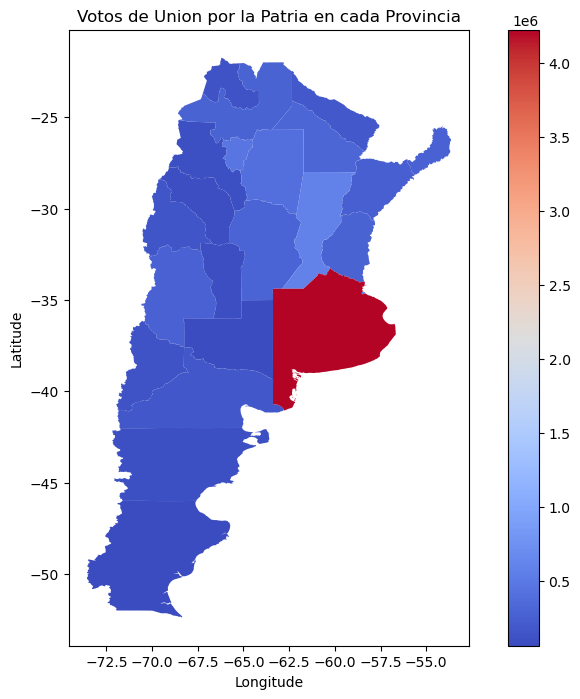

In [38]:
# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 8))

# Set the aspect ratio to 'equal' for a better aspect
ax.set_aspect('equal')

merged_arg_up_gdf.plot(column='votos_grales', cmap='coolwarm', ax=ax, legend=True)

# Add labels, title, and legend
plt.title('Votos de Union por la Patria en cada Provincia')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

Text(299.75392850257776, 0.5, 'Latitude')

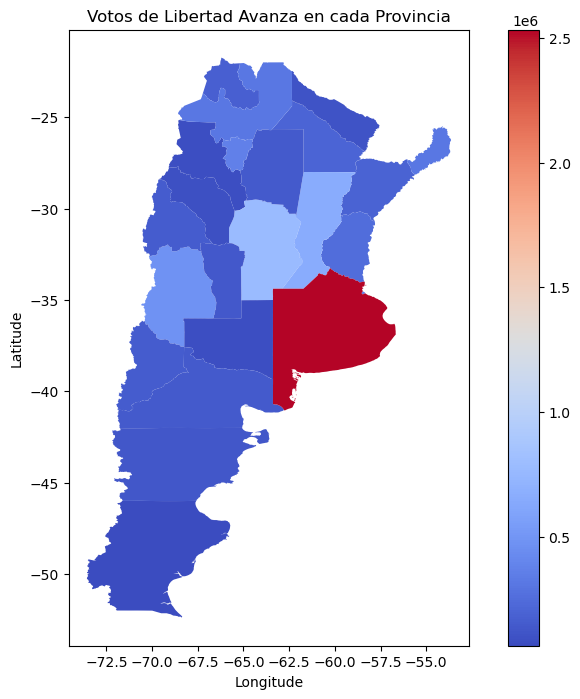

In [39]:
# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 8))

# Set the aspect ratio to 'equal' for a better aspect
ax.set_aspect('equal')

merged_arg_la_gdf.plot(column='votos_grales', cmap='coolwarm', ax=ax, legend=True)

# Add labels, title, and legend
plt.title('Votos de Libertad Avanza en cada Provincia')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

#### Dataset para comparar paso vs generales 

In [40]:
## nivel de apertura completo
source_grales_vs_paso_presi=duckdb.sql("""
select g.distrito_id,g.distrito_nombre,g.seccionprovincial_id, g.seccionprovincial_nombre,g.seccion_id,g.seccion_nombre,
       g.circuito_id,g.circuito_nombre,g.mesa_id,g.mesa_tipo,g.mesa_electores,g.agrupacion_id,
       g.agrupacion_nombre,g.votos_tipo, sum(COALESCE(p.votos_cantidad, 0))::INT as votos_paso, sum(COALESCE(g.votos_cantidad,0))::INT as votos_grales
 from re_grales.parquet g 
    full join (select año,eleccion_tipo,recuento_tipo,padron_tipo,distrito_id,distrito_nombre,seccionprovincial_id,
            seccionprovincial_nombre,seccion_id,seccion_nombre,circuito_id,circuito_nombre,mesa_id,mesa_tipo,
            mesa_electores,cargo_id,cargo_nombre,agrupacion_id,agrupacion_nombre,votos_tipo,sum(votos_cantidad)::INT as votos_cantidad from re_paso.parquet
            where cargo_id = 1 
            group by 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20) p on 
        g.distrito_id = p.distrito_id 
        and g.seccionprovincial_id = p.seccionprovincial_id
        and g.seccion_id = p.seccion_id
        and g.circuito_id = p.circuito_id
        and g.mesa_id = p.mesa_id
        and g.cargo_id = p.cargo_id
        and g.agrupacion_id = p.agrupacion_id     
where g.cargo_id = 1 
group by 1,2,3,4,5,6,7,8,9,10,11,12,13,14;""").df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [41]:
## bajada a archivos csv
source_grales_vs_paso_presi.to_csv('grales_vs_paso_presi.csv', index=False, encoding='latin1') 

In [42]:
## nivel de apertura hasta seccion
source_grales_vs_paso_presi_agrup=duckdb.sql("""
select g.distrito_id,g.distrito_nombre,g.seccionprovincial_id, g.seccionprovincial_nombre,g.seccion_id,g.seccion_nombre,
       g.agrupacion_id,g.agrupacion_nombre,g.votos_tipo, sum(COALESCE(p.votos_cantidad, 0))::INT as votos_paso, sum(COALESCE(g.votos_cantidad,0))::INT as votos_grales
 from re_grales.parquet g 
    full join (select año,eleccion_tipo,recuento_tipo,padron_tipo,distrito_id,distrito_nombre,seccionprovincial_id,
            seccionprovincial_nombre,seccion_id,seccion_nombre,circuito_id,circuito_nombre,mesa_id,mesa_tipo,
            mesa_electores,cargo_id,cargo_nombre,agrupacion_id,agrupacion_nombre,votos_tipo,sum(votos_cantidad)::INT as votos_cantidad from re_paso.parquet
            where cargo_id = 1 
            group by 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20) p on 
        g.distrito_id = p.distrito_id 
        and g.seccionprovincial_id = p.seccionprovincial_id
        and g.seccion_id = p.seccion_id
        and g.circuito_id = p.circuito_id
        and g.mesa_id = p.mesa_id
        and g.cargo_id = p.cargo_id
        and g.agrupacion_id = p.agrupacion_id     
where g.cargo_id = 1 
group by 1,2,3,4,5,6,7,8,9;""").df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [43]:
## bajada a archivos csv
source_grales_vs_paso_presi_agrup.to_csv('grales_vs_paso_presi_agrup.csv', index=False, encoding='latin1') 

In [44]:
## cargo presidente union de paso y gral

source_paso_gral = duckdb.sql("""
select año as anio, eleccion_tipo,recuento_tipo,distrito_id,distrito_nombre as provincia,cargo_id,cargo_nombre as cargo,
agrupacion_id,agrupacion_nombre as partido,votos_tipo, sum(votos_cantidad)::INT as votos
from re_paso.parquet 
where cargo_id = 1
group by 1,2,3,4,5,6,7,8,9,10
union
select año, eleccion_tipo,recuento_tipo,distrito_id,distrito_nombre as provincia,cargo_id,cargo_nombre as cargo,
agrupacion_id,agrupacion_nombre as partido,votos_tipo, sum(votos_cantidad)::INT as votos
from re_grales.parquet 
where cargo_id = 1
group by 1,2,3,4,5,6,7,8,9,10
""").df()


In [45]:
csv_file_path = 'union_paso_gral_presi_prov.csv'

source_paso_gral.to_csv(csv_file_path, index=False, encoding='latin1') 